Import neccessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

Load the Dataset

In [2]:
data = pd.read_csv('/kaggle/input/forest-cover/train.csv')
print(data.head())

print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
print(data.isnull().sum())


   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220          

In [3]:
print(data.dtypes)

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

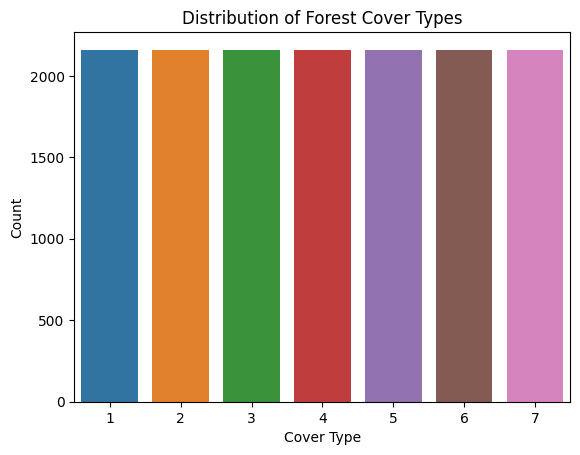

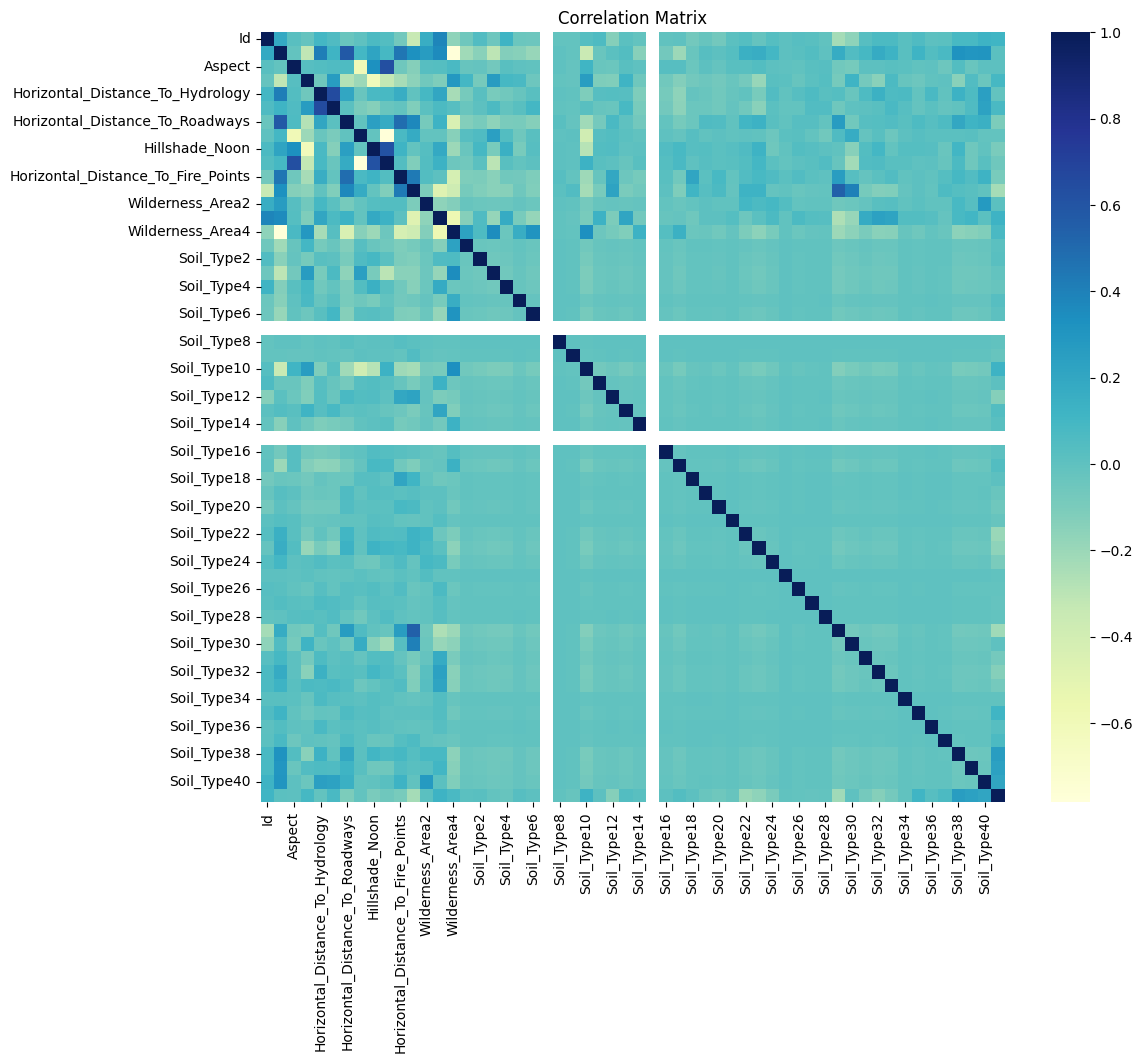

In [4]:
# Distribution of the target variable
sns.countplot(x='Cover_Type', data=data)
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Create Train and Test dataset, and train a random forest classifier on the train data set

In [5]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=44)

# Train the model
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=44)

Evaluating the Model

Accuracy: 0.8673941798941799

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.80      0.79       432
           2       0.80      0.67      0.73       432
           3       0.84      0.83      0.84       432
           4       0.94      0.98      0.96       432
           5       0.90      0.94      0.92       432
           6       0.84      0.89      0.87       432
           7       0.94      0.97      0.96       432

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



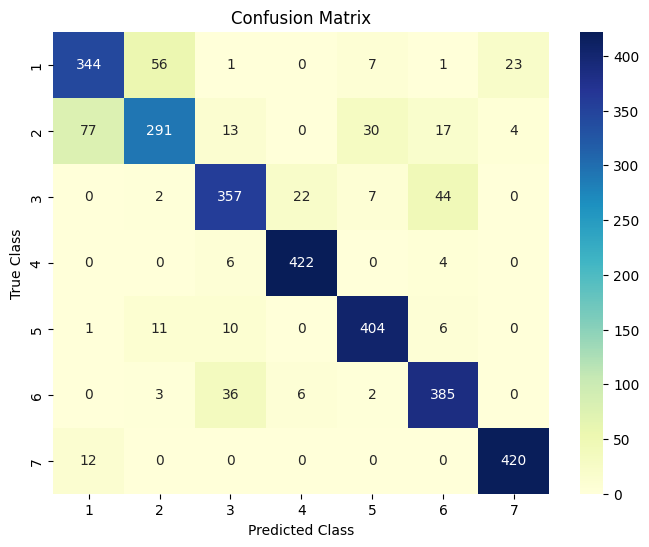

In [7]:
# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=range(1,8), yticklabels=range(1,8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


Using grid search to figure out more optimal hyperparameters and fine tune the model

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Accuracy: 0.8792989417989417

Tuned Model Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       432
           2       0.80      0.70      0.74       432
           3       0.87      0.84      0.86       432
           4       0.94      0.98      0.96       432
           5       0.91      0.96      0.93       432
           6       0.87      0.91      0.89       432
           7       0.94      0.97      0.96       432

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



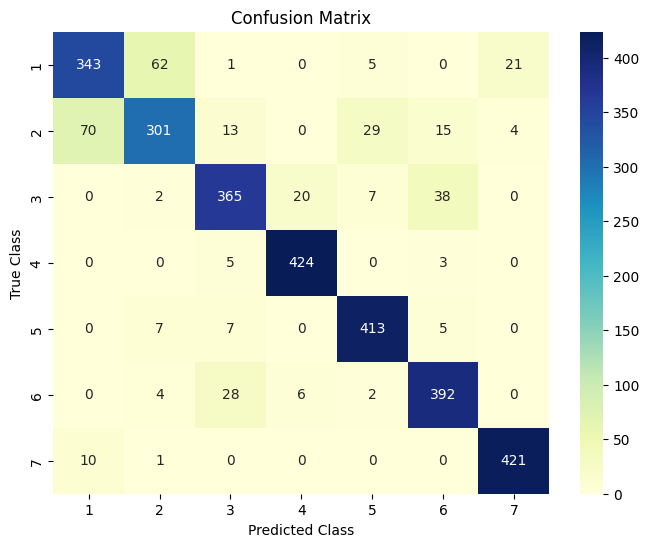

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   4.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.1s
[CV] END bootstrap=True, max_depth=20, min_samples_lea

In [8]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

#GridSearch
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_rfc = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rfc.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))


# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=range(1,8), yticklabels=range(1,8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

The average accuracy attained is 0.88 , and it is fine for the scope of this project. The accuracy can be increased by deep learning techniques, feature engineering and dimensionality reduction techniques. But 0.88 is good as far as this project is concerned. Let's save the model as a file using pickle. This file can be used for prediction in a prediction system without training everytime.

In [10]:
import pickle

# Save the model as a file
with open('tuned_random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rfc, model_file)


